In [1]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    try:
        value=sy.symbols('{0:.3f}'.format(r)+unidade)
    except:
        #print("symbolic")
        value=r
    display(pd.DataFrame([cell_vars()]).round(2).transpose())
    print('A resposta final é:')
    display(value)

def cell_vars(offset=0):
    import io
    from contextlib import redirect_stdout

    ipy = get_ipython()
    out = io.StringIO()

    with redirect_stdout(out):
        ipy.magic("history {0}".format(ipy.execution_count - offset))

    #process each line...
    x = out.getvalue().replace(" ", "").split("\n")
    print("AAAAAAAAAAAAA")
    print(x)
    x = [a.split("=")[0] for a in x if "=" in a] #all of the variables in the cell
    g = globals()
    result = {k:g[k] for k in x if k in g}
    return result

from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)


<IPython.core.display.Math object>

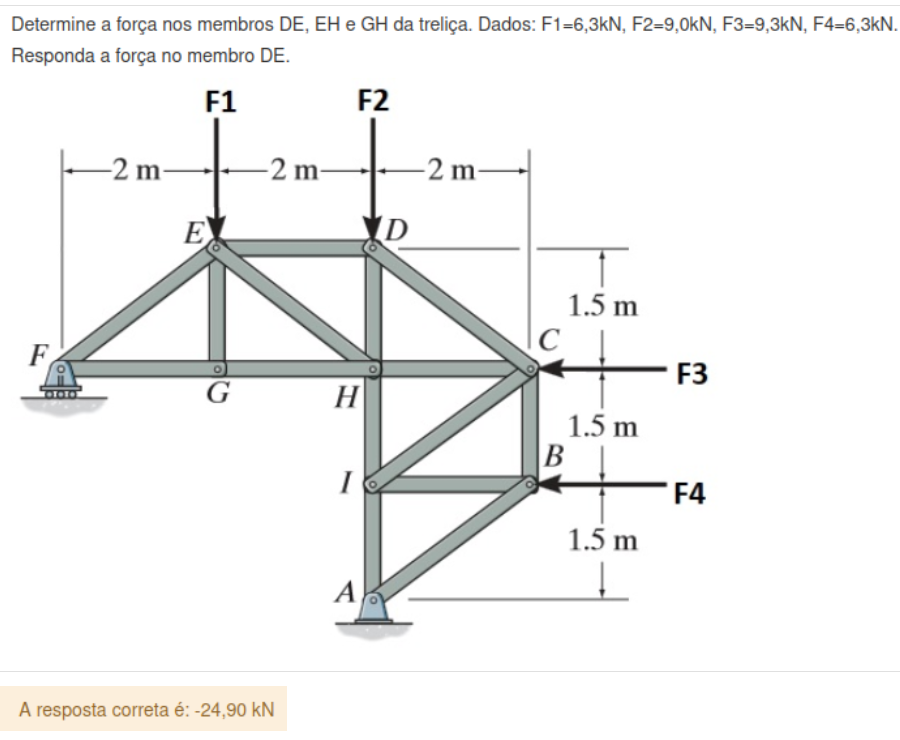

In [2]:
questao='1.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [3]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F1=6.3
F2=9
F3=9.3
F4=6.3


In [4]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
RFy=(2*F1+3*F3+1.5*F4)/4
FEHy=RFy-F1
dEH=(2**2+1.5**2)**0.5
FEH=FEHy*dEH/1.5
FEHx=FEH*2/dEH
FGH=2*RFy/1.5
FED=-FEHx-FGH
resposta(FED,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'RFy=(2*F1+3*F3+1.5*F4)/4', 'FEHy=RFy-F1', 'dEH=(2**2+1.5**2)**0.5', 'FEH=FEHy*dEH/1.5', 'FEHx=FEH*2/dEH', 'FGH=2*RFy/1.5', 'FED=-FEHx-FGH', "resposta(FED,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
RFy   12.49
FEHy   6.19
dEH    2.50
FEH   10.31
FEHx   8.25
FGH   16.65
FED  -24.90

A resposta final é:


-24.900kN

<IPython.core.display.Math object>

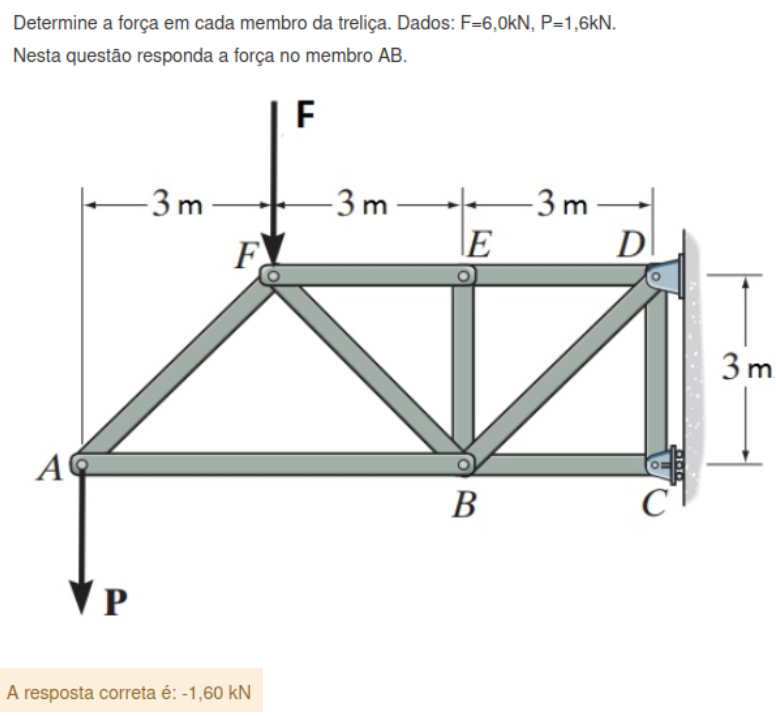

In [5]:
questao='1.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [6]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F=6
P=1.6


In [7]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
Fab=-P
resposta(Fab,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'Fab=-P', "resposta(Fab,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
Fab -1.6

A resposta final é:


-1.600kN

<IPython.core.display.Math object>

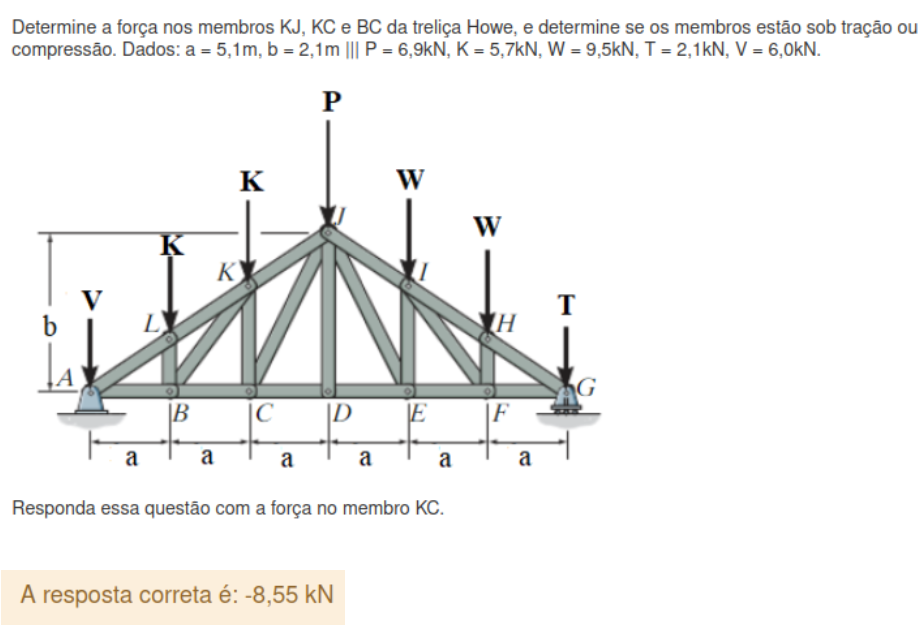

In [8]:
questao='1.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [9]:
%%write_and_run ../data/Q5/inputs/{questao}.py
a=5.1
b=2.1
P=6.9
K=5.7
W=9.5
T=2.1
V=6


In [10]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
RGy=K/2+P/2+3/2*W+T

dJK=((3*a)**2+b**2)**0.5
FJK=(4*(T-RGy)+P+5*W)*(dJK)/(2*b)
FJKx=3*a/dJK*FJK
FJKy=b/dJK*FJK
FCB=-FJKx
FCK=FJKy+P+2*W+T-RGy
FCK=P+3*W+2*T-K/2
resposta(FCK,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'RGy=K/2+P/2+3/2*W+T', '', 'dJK=((3*a)**2+b**2)**0.5', 'FJK=(4*(T-RGy)+P+5*W)*(dJK)/(2*b)', 'FJKx=3*a/dJK*FJK', 'FJKy=b/dJK*FJK', 'FCB=-FJKx', 'FCK=FJKy+P+2*W+T-RGy', 'FCK=P+3*W+2*T-K/2', "resposta(FCK,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
RGy    22.65
dJK    15.44
FJK  -102.22
FJKx -101.27
FJKy  -13.90
FCB   101.27
FCK    36.75

A resposta final é:


36.750kN

<IPython.core.display.Math object>

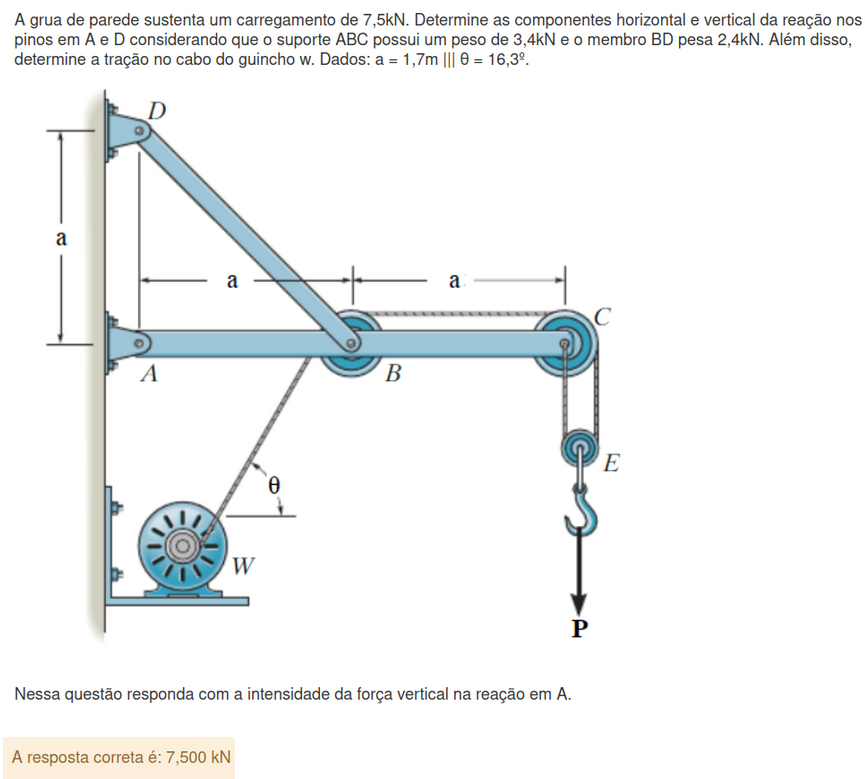

In [11]:
questao='1.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [12]:
%%write_and_run ../data/Q5/inputs/{questao}.py
thetad=16.3
a=1.7
P=7.5
PABC=3.4
PBD=2.4


In [13]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
theta=np.deg2rad(thetad)
FBW=P/2
FBWy=sy.sin(theta)*FBW
FBWx=sy.cos(theta)*FBW
RDx=-2*P-PBD/2-PABC-FBWy
RAx=FBWx-RDx
RDy=-RDx+PBD/2
RAy=PBD+PABC+P+FBWy-RDy
resposta(abs(RAy),'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'theta=np.deg2rad(thetad)', 'FBW=P/2', 'FBWy=sy.sin(theta)*FBW', 'FBWx=sy.cos(theta)*FBW', 'RDx=-2*P-PBD/2-PABC-FBWy', 'RAx=FBWx-RDx', 'RDy=-RDx+PBD/2', 'RAy=PBD+PABC+P+FBWy-RDy', "resposta(abs(RAy),'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
theta               0.28
FBW                 3.75
FBWy    1.05250015845295
FBWx    3.59926984490695
RDx    -20.6525001584530
RAx     24.2517700033599
RDy     21.8525001584530
RAy    -7.50000000000000

A resposta final é:


7.500kN

<IPython.core.display.Math object>

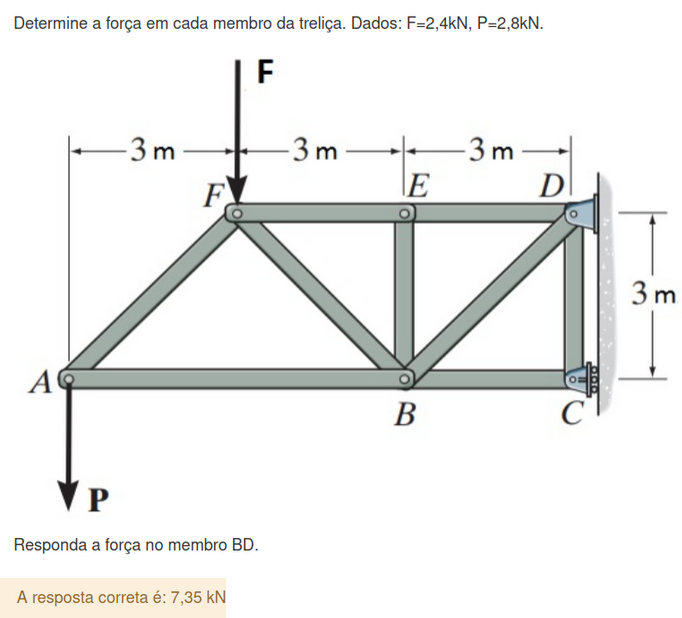

In [14]:
questao='1.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [15]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F=2.4
P=2.8


In [16]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FBD=(P+F)/sy.sin(np.pi/4)
resposta(FBD,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FBD=(P+F)/sy.sin(np.pi/4)', "resposta(FBD,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FBD  7.35391052434009

A resposta final é:


7.354kN

<IPython.core.display.Math object>

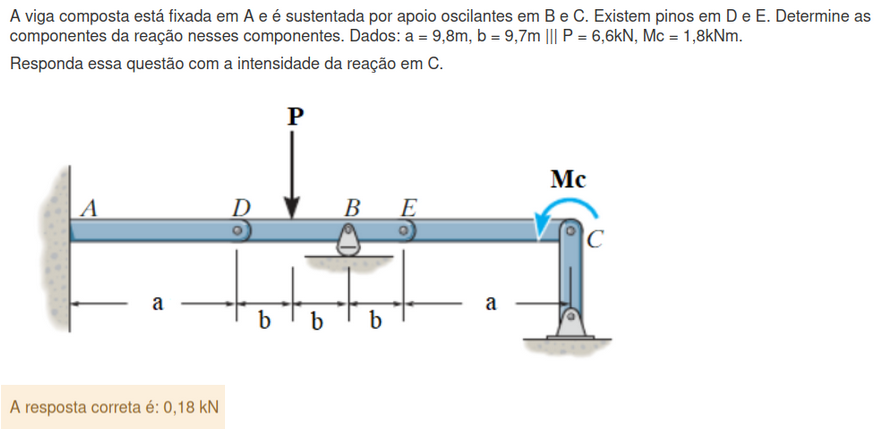

In [17]:
questao='1.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [18]:
%%write_and_run ../data/Q5/inputs/{questao}.py
a=9.8
b=9.7
P=6.6
Mc=1.8


In [19]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FEy=Mc/a
FC=-FEy
resposta(abs(FC),'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FEy=Mc/a', 'FC=-FEy', "resposta(abs(FC),'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FEy  0.18
FC  -0.18

A resposta final é:


0.184kN

<IPython.core.display.Math object>

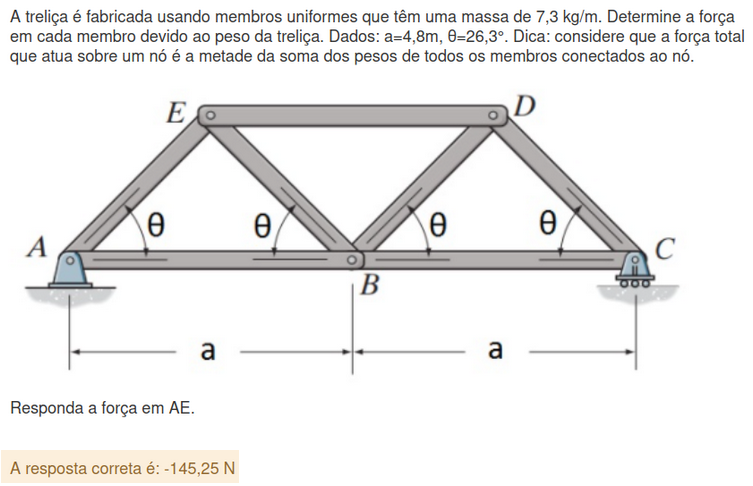

In [20]:
questao='1.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [21]:
%%write_and_run ../data/Q5/inputs/{questao}.py
d=7.3
a=4.8
thetad=26.3


In [22]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
g=1
theta=np.deg2rad(thetad)
L=a/2/sy.cos(theta)
P1=a*d*g
P2=4*L*d*g
P3=2*a*d*g
RCy=(P1+P2+P3)/2
FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2
FEA=FEAy/sy.sin(theta)
resposta(FEA,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'g=1', 'theta=np.deg2rad(thetad)', 'L=a/2/sy.cos(theta)', 'P1=a*d*g', 'P2=4*L*d*g', 'P3=2*a*d*g', 'RCy=(P1+P2+P3)/2', 'FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2', 'FEA=FEAy/sy.sin(theta)', "resposta(FEA,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
g                      1
theta               0.46
L       2.67711804513704
P1                 35.04
P2      78.1718469180016
P3                 70.08
RCy     91.6459234590008
FEAy   -64.3544425942506
FEA    -145.246280794158

A resposta final é:


-145.246N

<IPython.core.display.Math object>

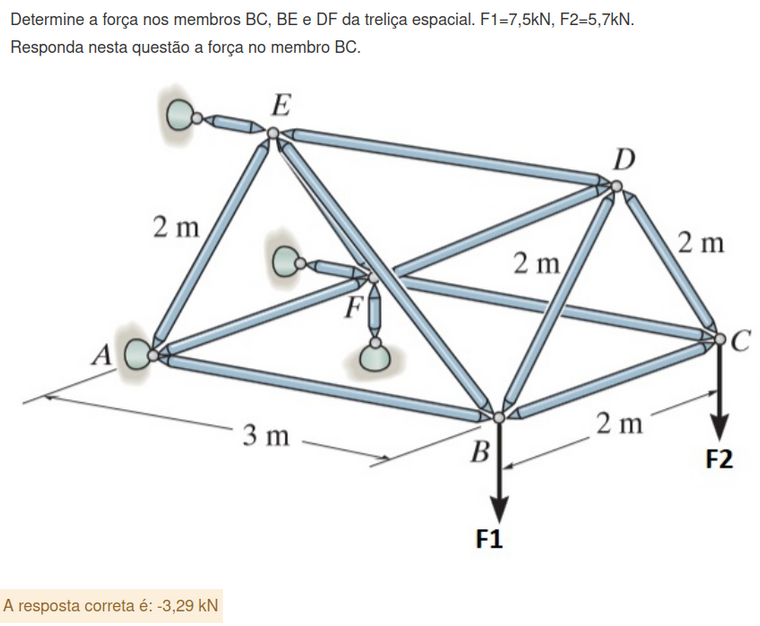

In [23]:
questao='1.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [24]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F1=7.5
F2=5.7


In [25]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FCDy=F2
FCD=2*3**0.5/3*FCDy
FCDz=FCD/2
FBC=-FCDz
resposta(FBC,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FCDy=F2', 'FCD=2*3**0.5/3*FCDy', 'FCDz=FCD/2', 'FBC=-FCDz', "resposta(FBC,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FCDy  5.70
FCD   6.58
FCDz  3.29
FBC  -3.29

A resposta final é:


-3.291kN

<IPython.core.display.Math object>

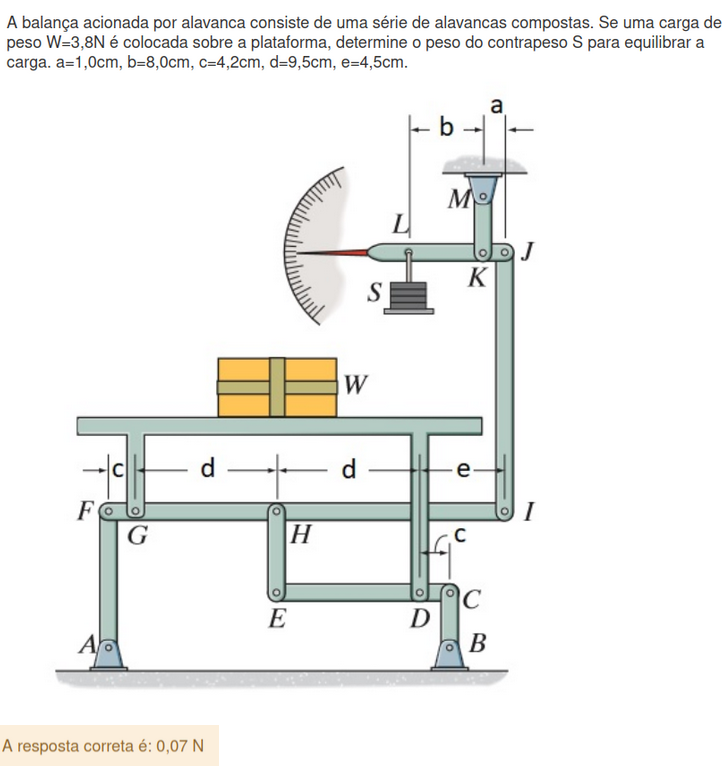

In [26]:
questao='1.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [27]:
%%write_and_run ../data/Q5/inputs/{questao}.py
a=1
b=8
c=4.2
d=9.5
e=4.5
W=3.8


In [28]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
Gy=W/2
Dy=W/2
FEHy=Dy*c/(d+c)
Iy=(Gy*c+(c+d)*FEHy)/(c+2*d+e)
S=a*Iy/b
resposta(S,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'Gy=W/2', 'Dy=W/2', 'FEHy=Dy*c/(d+c)', 'Iy=(Gy*c+(c+d)*FEHy)/(c+2*d+e)', 'S=a*Iy/b', "resposta(S,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
Gy    1.90
Dy    1.90
FEHy  0.58
Iy    0.58
S     0.07

A resposta final é:


0.072N

<IPython.core.display.Math object>

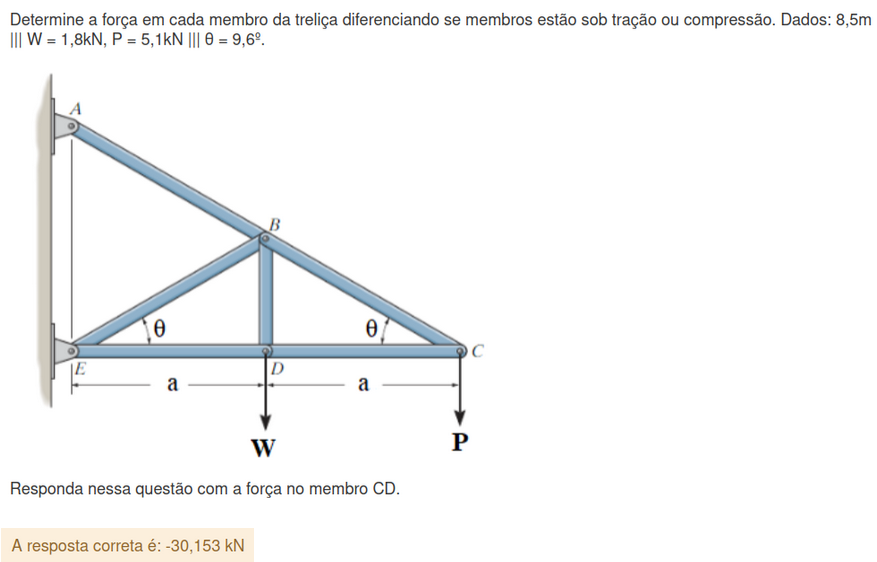

In [29]:
questao='1.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [30]:
%%write_and_run ../data/Q5/inputs/{questao}.py
W=1.8
P=5.1
thetad=9.6


In [31]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
theta=np.deg2rad(thetad)
FCD=-P/sy.tan(theta)
resposta(FCD,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'theta=np.deg2rad(thetad)', 'FCD=-P/sy.tan(theta)', "resposta(FCD,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
theta               0.17
FCD    -30.1530106094756

A resposta final é:


-30.153kN

<IPython.core.display.Math object>

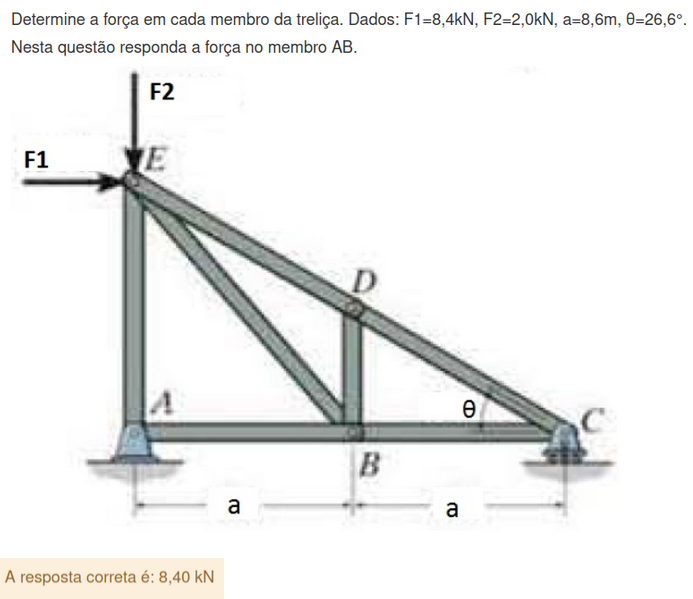

In [32]:
questao='2.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [33]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F1=8.4


In [34]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FAC=F1
resposta(FAC,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FAC=F1', "resposta(FAC,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FAC  8.4

A resposta final é:


8.400kN

<IPython.core.display.Math object>

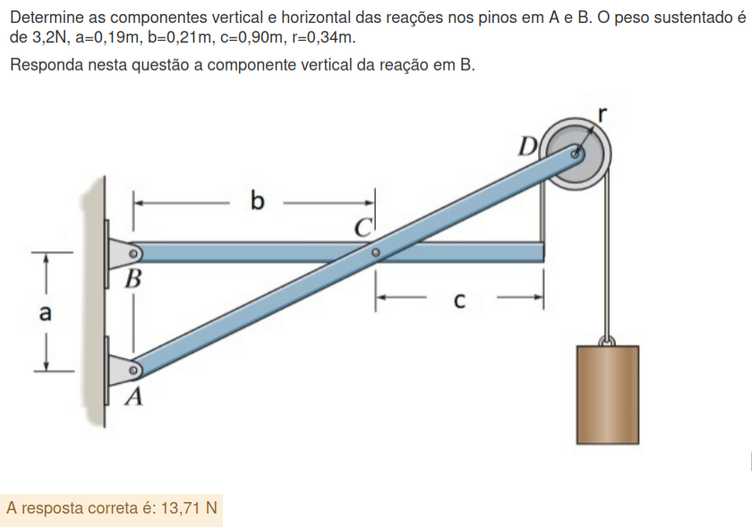

In [35]:
questao='2.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [36]:
%%write_and_run ../data/Q5/inputs/{questao}.py
P=3.2
a=0.19
b=0.21
c=0.9
r=0.34


In [37]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
By=c*P/b
resposta(By,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'By=c*P/b', "resposta(By,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
By  13.71

A resposta final é:


13.714N

<IPython.core.display.Math object>

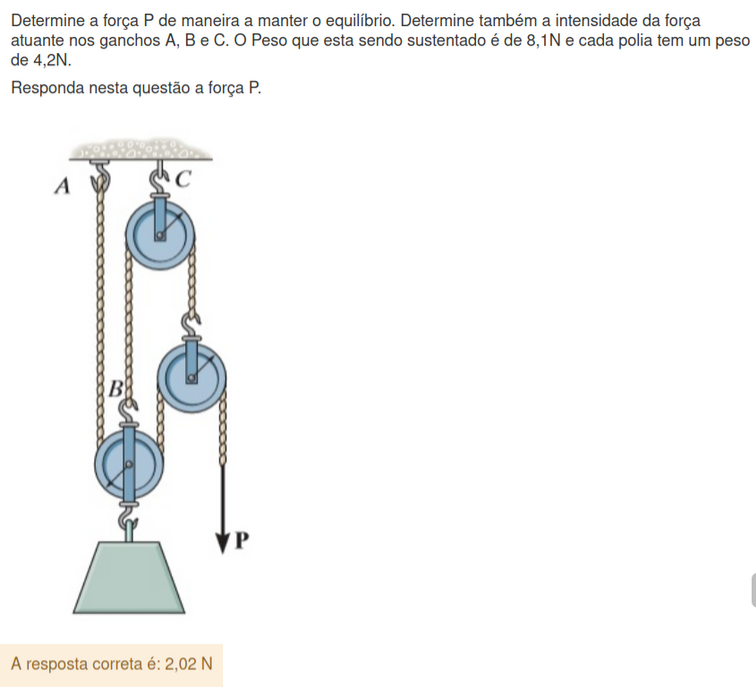

In [38]:
questao='2.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [39]:
%%write_and_run ../data/Q5/inputs/{questao}.py
K=4.2
W=8.1


In [40]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
P=W/4
resposta(P,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'P=W/4', "resposta(P,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
P  2.02

A resposta final é:


2.025N

<IPython.core.display.Math object>

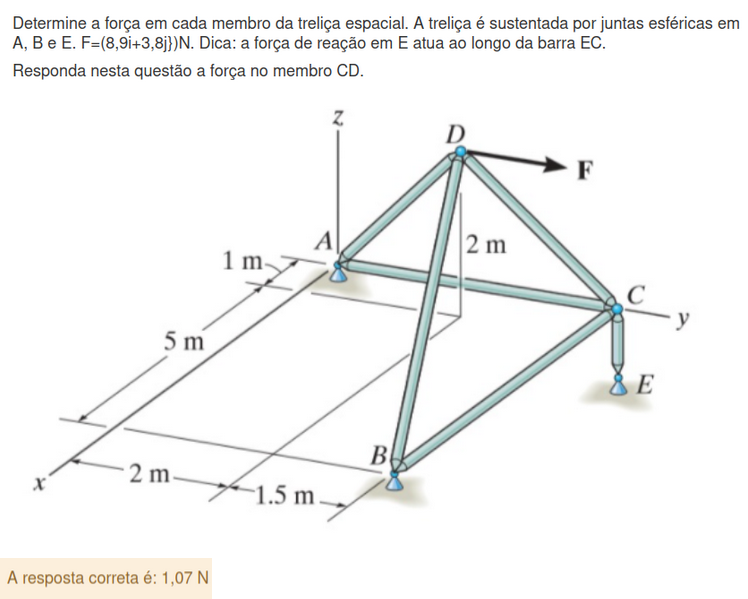

In [41]:
questao='2.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [42]:
%%write_and_run ../data/Q5/inputs/{questao}.py
a=8.9
b=3.8


In [43]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FDA=-1.10806881314185e-16*a + 0.857142857142857*b
FDB=-0.931694990624912*a - 3.58380791035485e-16*b
FDC=0.448763733927875*a - 0.769309258162072*b
resposta(FDC,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FDA=-1.10806881314185e-16*a+0.857142857142857*b', 'FDB=-0.931694990624912*a-3.58380791035485e-16*b', 'FDC=0.448763733927875*a-0.769309258162072*b', "resposta(FDC,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FDA  3.26
FDB -8.29
FDC  1.07

A resposta final é:


1.071N

<IPython.core.display.Math object>

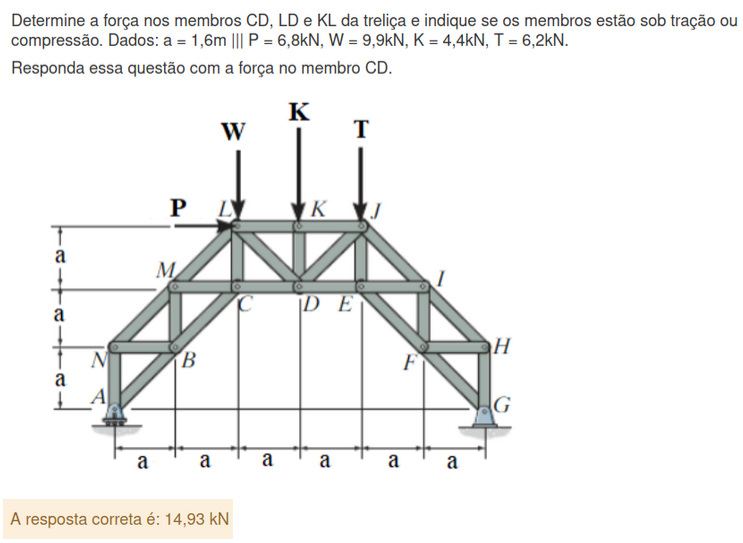

In [44]:
questao='2.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [45]:
%%write_and_run ../data/Q5/inputs/{questao}.py
a=1.6
P=6.8
W=9.9
K=4.4
T=6.2


In [46]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
Ay=1/6*(-3*P+4*W+3*K+2*T)
FCD=2*Ay
resposta(FCD,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'Ay=1/6*(-3*P+4*W+3*K+2*T)', 'FCD=2*Ay', "resposta(FCD,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
Ay    7.47
FCD  14.93

A resposta final é:


14.933kN

<IPython.core.display.Math object>

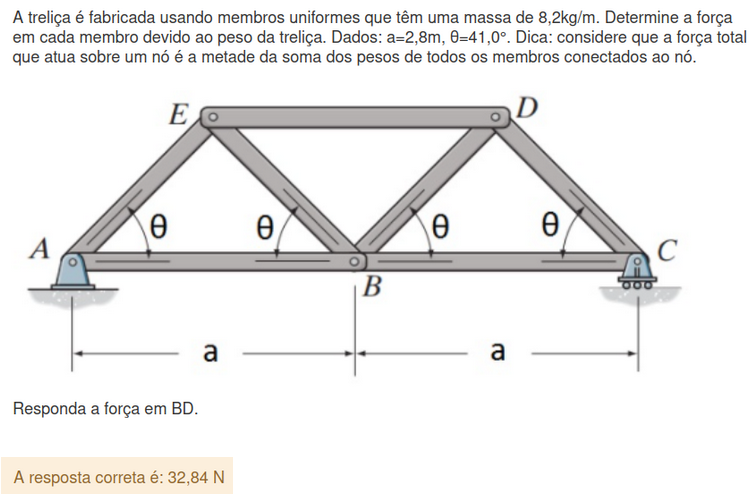

In [47]:
questao='2.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [48]:
%%write_and_run ../data/Q5/inputs/{questao}.py
d=8.2
a=2.8
thetad=41


In [49]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
g=1
theta=np.deg2rad(thetad)
L=a/2/sy.cos(theta)
P1=a*d*g
P2=4*L*d*g
P3=2*a*d*g
RCy=(P1+P2+P3)/2
FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2
FEA=FEAy/sy.sin(theta)

FBDy=RCy-(3/2*L+a)*d*g
FBD=FBDy/sy.sin(theta)
resposta(FBD,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'g=1', 'theta=np.deg2rad(thetad)', 'L=a/2/sy.cos(theta)', 'P1=a*d*g', 'P2=4*L*d*g', 'P3=2*a*d*g', 'RCy=(P1+P2+P3)/2', 'FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2', 'FEA=FEAy/sy.sin(theta)', '', 'FBDy=RCy-(3/2*L+a)*d*g', 'FBD=FBDy/sy.sin(theta)', "resposta(FBD,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
g                      1
theta               0.72
L       1.85501819068834
P1                 22.96
P2      60.8445966545774
P3                 45.92
RCy     64.8622983272887
FEAy   -45.7767237454665
FEA    -69.7753124683067
FBDy    19.0855745818222
FBD     29.0912459678965

A resposta final é:


29.091N

<IPython.core.display.Math object>

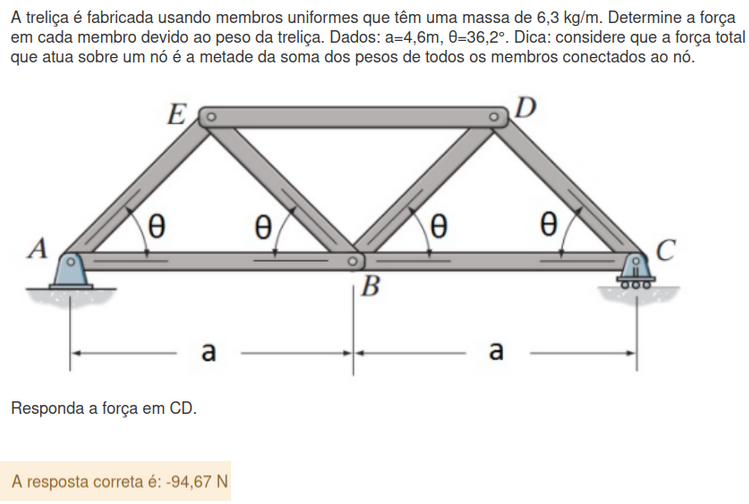

In [50]:
questao='2.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [51]:
%%write_and_run ../data/Q5/inputs/{questao}.py
d=6.3
a=4.6
thetad=36.2


In [52]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
g=1
theta=np.deg2rad(thetad)
L=a/2/sy.cos(theta)
P1=a*d*g
P2=4*L*d*g
P3=2*a*d*g
RCy=(P1+P2+P3)/2
FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2
FEA=FEAy/sy.sin(theta)

FBDy=RCy-(3/2*L+a)*d*g
FBD=FBDy/sy.sin(theta)
FCD=FEA
resposta(FCD,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'g=1', 'theta=np.deg2rad(thetad)', 'L=a/2/sy.cos(theta)', 'P1=a*d*g', 'P2=4*L*d*g', 'P3=2*a*d*g', 'RCy=(P1+P2+P3)/2', 'FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2', 'FEA=FEAy/sy.sin(theta)', '', 'FBDy=RCy-(3/2*L+a)*d*g', 'FBD=FBDy/sy.sin(theta)', 'FCD=FEA', "resposta(FCD,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
g                      1
theta               0.63
L       2.85020212938320
P1                 28.98
P2      71.8250936604567
P3                 57.96
RCy     79.3825468302284
FEAy   -55.9144101226713
FEA    -94.6729995802446
FBDy    23.4681367075571
FBD     39.7357119888995
FCD    -94.6729995802446

A resposta final é:


-94.673N

<IPython.core.display.Math object>

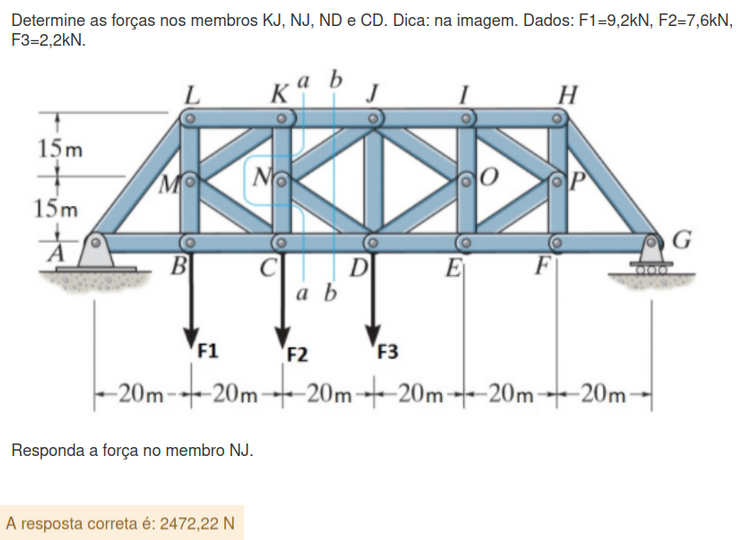

In [53]:
questao='2.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [54]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F1=9.2
F2=7.6
F3=2.2


In [55]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
Gy=(F1+2*F2+3*F3)/6
Ay=F1+F2+F3-Gy
FKJ=(2*F1-4*Ay)/3
FNJx=-2*Gy-FKJ
FNJ=5/4*FNJx
resposta(FNJ,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'Gy=(F1+2*F2+3*F3)/6', 'Ay=F1+F2+F3-Gy', 'FKJ=(2*F1-4*Ay)/3', 'FNJx=-2*Gy-FKJ', 'FNJ=5/4*FNJx', "resposta(FNJ,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
Gy     5.17
Ay    13.83
FKJ  -12.31
FNJx   1.98
FNJ    2.47

A resposta final é:


2.472kN

<IPython.core.display.Math object>

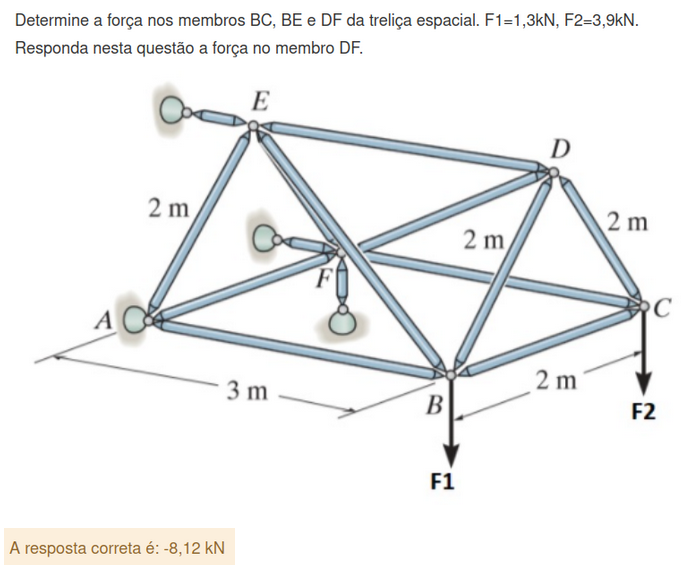

In [56]:
questao='2.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [57]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F1=1.3
F2=3.9


In [58]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FCDy=F2
FCD=2*3**0.5/3*FCDy
FCDz=FCD/2
FBC=-FCDz
FDFy=-FCD
FDF=13**0.5/2*FDFy
resposta(FDF,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FCDy=F2', 'FCD=2*3**0.5/3*FCDy', 'FCDz=FCD/2', 'FBC=-FCDz', 'FDFy=-FCD', 'FDF=13**0.5/2*FDFy', "resposta(FDF,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FCDy  3.90
FCD   4.50
FCDz  2.25
FBC  -2.25
FDFy -4.50
FDF  -8.12

A resposta final é:


-8.118kN

<IPython.core.display.Math object>

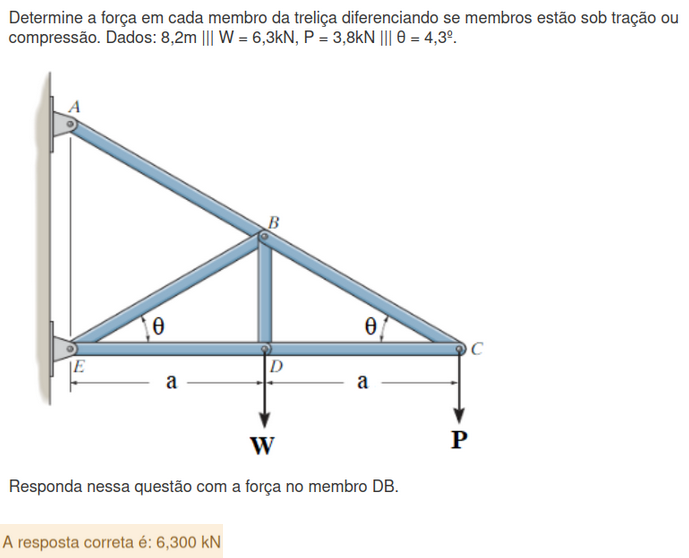

In [59]:
questao='2.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [60]:
%%write_and_run ../data/Q5/inputs/{questao}.py
W=6.3


In [61]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FDB=W
resposta(FDB,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FDB=W', "resposta(FDB,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FDB  6.3

A resposta final é:


6.300kN

<IPython.core.display.Math object>

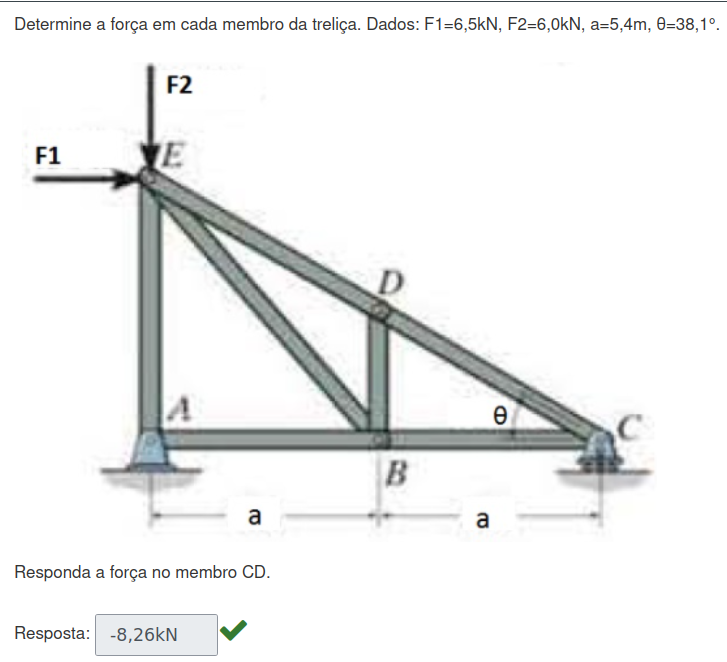

In [62]:
questao='3.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [63]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F1=6.5
thetad = 38.1


In [64]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
theta=np.deg2rad(thetad)
FCD=-F1/sy.cos(theta)
resposta(FCD,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'theta=np.deg2rad(thetad)', 'FCD=-F1/sy.cos(theta)', "resposta(FCD,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
theta               0.66
FCD    -8.25989416991451

A resposta final é:


-8.260kN

<IPython.core.display.Math object>

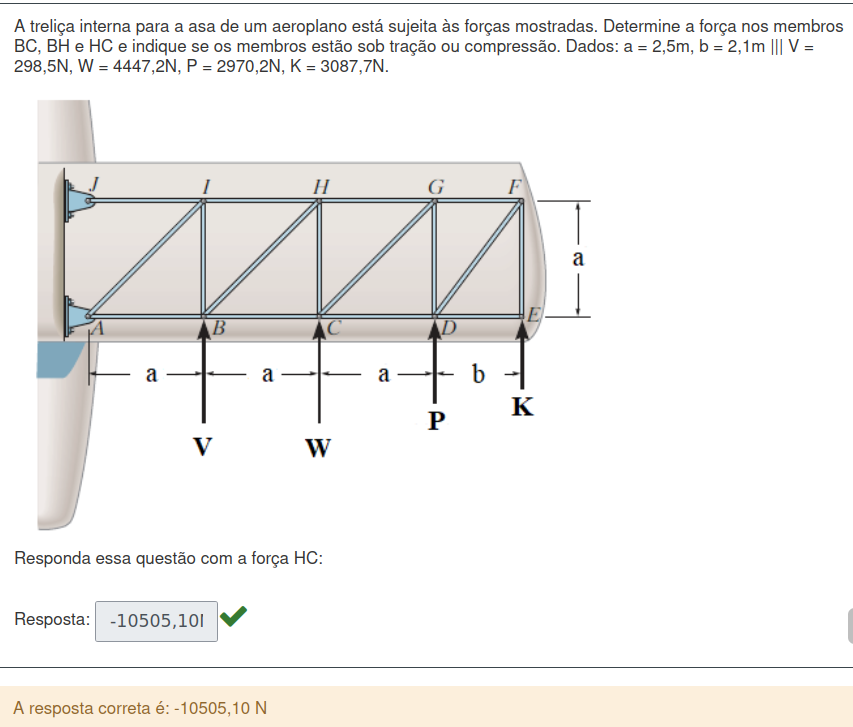

In [65]:
questao='3.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [66]:
%%write_and_run ../data/Q5/inputs/{questao}.py
a=2.5
b=2.1
W=4447.2
P=2970.2
K=3087.7


In [67]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FCB=1/a*(P*a+K*(a+b))
FHB=(W+P+K)/sy.sin(np.pi/4)
FHC=-W-P-K
resposta(FHC,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FCB=1/a*(P*a+K*(a+b))', 'FHB=(W+P+K)/sy.sin(np.pi/4)', 'FHC=-W-P-K', "resposta(FHC,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FCB           8651.57
FHB  14856.4548940856
FHC          -10505.1

A resposta final é:


-10505.100N

<IPython.core.display.Math object>

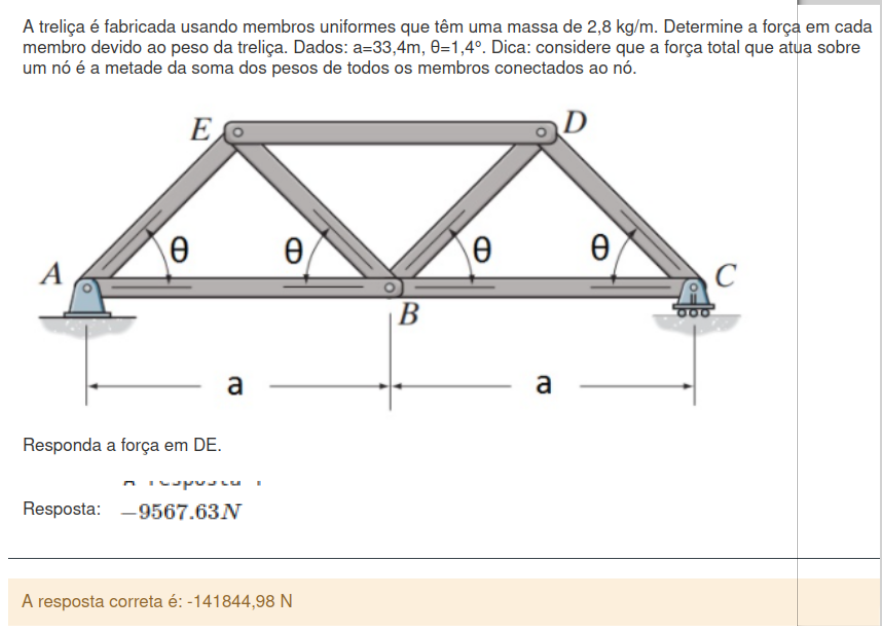

In [68]:
questao='3.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [69]:
%%write_and_run ../data/Q5/inputs/{questao}.py
d=2.8
a=33.4
thetad=1.4
g=1


In [70]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
theta=np.deg2rad(thetad)
L=a/2/sy.cos(theta)
P1=a*d*g
P2=4*L*d*g
P3=2*a*d*g
RCy=(P1+P2+P3)/2
FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2
FEA=FEAy/sy.sin(theta)

FBDy=RCy-(3/2*L+a)*d*g
FBD=FBDy/sy.sin(theta)
FCD=FEA

FBDx=FBD*sy.cos(theta)
FCDx=FCD*sy.cos(theta)
FDE=FCDx-FBDx

resposta(FDE,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'theta=np.deg2rad(thetad)', 'L=a/2/sy.cos(theta)', 'P1=a*d*g', 'P2=4*L*d*g', 'P3=2*a*d*g', 'RCy=(P1+P2+P3)/2', 'FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2', 'FEA=FEAy/sy.sin(theta)', '', 'FBDy=RCy-(3/2*L+a)*d*g', 'FBD=FBDy/sy.sin(theta)', 'FCD=FEA', '', 'FBDx=FBD*sy.cos(theta)', 'FCDx=FCD*sy.cos(theta)', 'FDE=FCDx-FBDx', '', "resposta(FDE,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
theta               0.02
L       16.7049866092080
P1                 93.52
P2      187.095850023130
P3                187.04
RCy     233.827925011565
FEAy   -163.680943758674
FEA    -6699.40038648987
FBDy    70.1469812528913
FBD     2871.08995418298
FCD    -6699.40038648987
FBDx    2870.23290449251
FCDx   -6697.40054701455
FDE    -9567.63345150706

A resposta final é:


-9567.633N

<IPython.core.display.Math object>

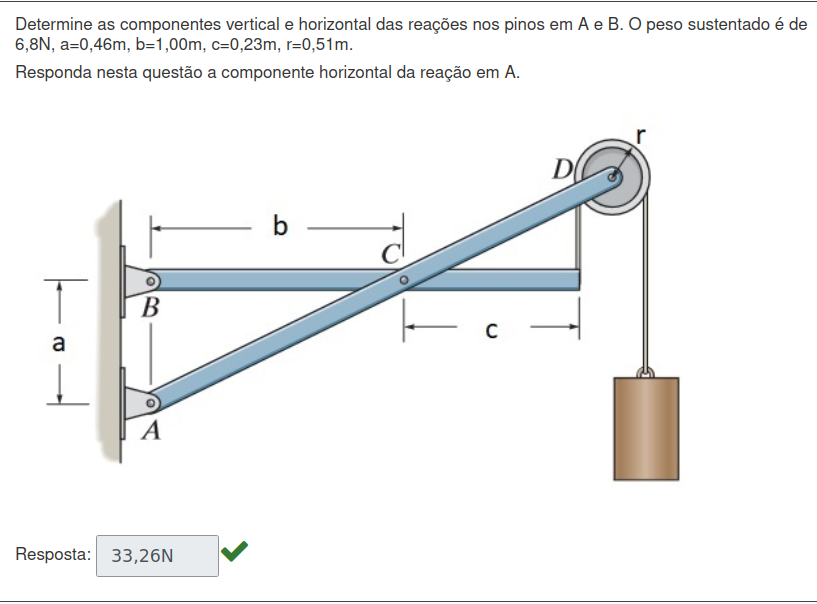

In [71]:
questao='3.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [72]:
%%write_and_run ../data/Q5/inputs/{questao}.py
P=6.8
a=0.46
b=1
c=0.23
r=0.51


In [73]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
By=P*c/b
Cy=-P*c/b-P
Ay=P*(1-c/b)
Ax=P*(2*r+c+b)/a
Bx=-Ax
resposta(Ax,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'By=P*c/b', 'Cy=-P*c/b-P', 'Ay=P*(1-c/b)', 'Ax=P*(2*r+c+b)/a', 'Bx=-Ax', "resposta(Ax,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
By   1.56
Cy  -8.36
Ay   5.24
Ax  33.26
Bx -33.26

A resposta final é:


33.261N

<IPython.core.display.Math object>

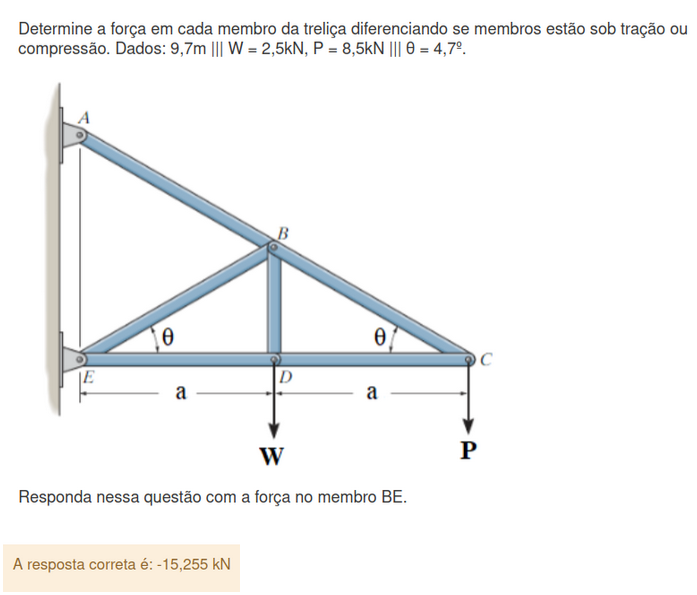

In [74]:
questao='3.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [75]:
%%write_and_run ../data/Q5/inputs/{questao}.py
a=9.7
W=2.5
P=8.5
thetad=4.7


In [76]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
theta=np.deg2rad(thetad)
FCB=P/sy.sin(theta)
FCD=-P/sy.tan(theta)
FDB=W
FDE=-P/sy.tan(theta)
Ex=(2*P+W)/(2*sy.tan(theta))
Ax=-Ex
FAB=(2*P+W)/(2*sy.sin(theta))
FBE=-(1/sy.cos(theta)*((2*P+W)/(2*sy.tan(theta))-P/sy.tan(theta)))
resposta(FBE,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'theta=np.deg2rad(thetad)', 'FCB=P/sy.sin(theta)', 'FCD=-P/sy.tan(theta)', 'FDB=W', 'FDE=-P/sy.tan(theta)', 'Ex=(2*P+W)/(2*sy.tan(theta))', 'Ax=-Ex', 'FAB=(2*P+W)/(2*sy.sin(theta))', 'FBE=-(1/sy.cos(theta)*((2*P+W)/(2*sy.tan(theta))-P/sy.tan(theta)))', "resposta(FBE,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
theta               0.08
FCB     103.736327913633
FCD    -103.387502769942
FDB                  2.5
FDE    -103.387502769942
Ex      118.591547294934
Ax     -118.591547294934
FAB     118.991670253874
FBE    -15.2553423402402

A resposta final é:


-15.255kN

<IPython.core.display.Math object>

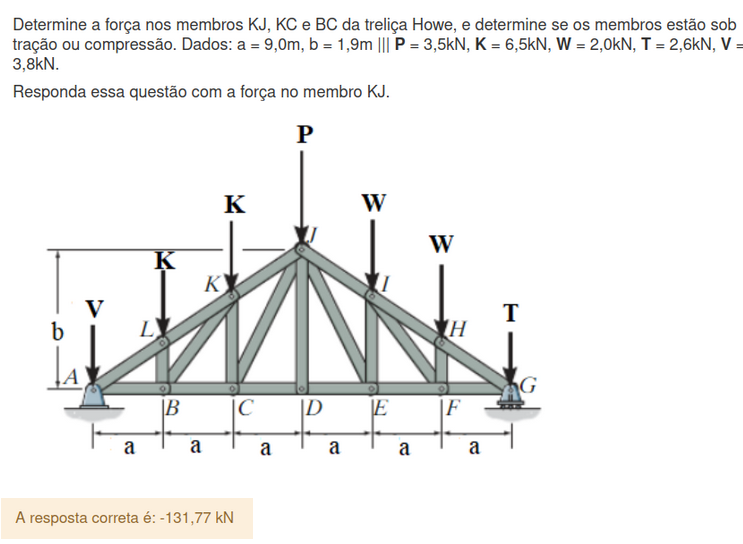

In [77]:
questao='3.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [78]:
%%write_and_run ../data/Q5/inputs/{questao}.py
a=9
b=1.9
P=3.5
K=6.5
W=2.0
T=2.6
V=3.8


In [79]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
RGy=K/2+P/2+3/2*W+T

dJK=((3*a)**2+b**2)**0.5
FJK=(4*(T-RGy)+P+5*W)*(dJK)/(2*b)
FJKx=3*a/dJK*FJK
FJKy=b/dJK*FJK
FCB=-FJKx
FCK=FJKy+P+2*W+T-RGy
resposta(FJK,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'RGy=K/2+P/2+3/2*W+T', '', 'dJK=((3*a)**2+b**2)**0.5', 'FJK=(4*(T-RGy)+P+5*W)*(dJK)/(2*b)', 'FJKx=3*a/dJK*FJK', 'FJKy=b/dJK*FJK', 'FCB=-FJKx', 'FCK=FJKy+P+2*W+T-RGy', "resposta(FJK,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
RGy    10.60
dJK    27.07
FJK  -131.77
FJKx -131.45
FJKy   -9.25
FCB   131.45
FCK    -9.75

A resposta final é:


-131.772kN

<IPython.core.display.Math object>

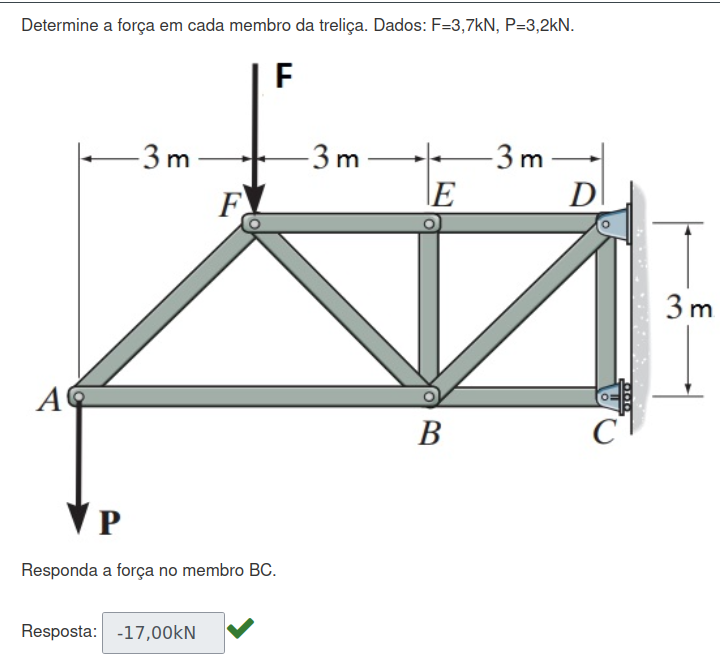

In [80]:
questao='3.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [81]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F=3.7
P=3.2


In [82]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FAF=2**0.5*P
FAB=-P
FCD=0
FCB=-3*P-2*F
FDE=2*P+F
FEF=2*P+F
FEB=0
FBF=-2**0.5*(F+P)
FDB=2**0.5*(F+P)
resposta(FCB,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FAF=2**0.5*P', 'FAB=-P', 'FCD=0', 'FCB=-3*P-2*F', 'FDE=2*P+F', 'FEF=2*P+F', 'FEB=0', 'FBF=-2**0.5*(F+P)', 'FDB=2**0.5*(F+P)', "resposta(FCB,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FAF   4.53
FAB  -3.20
FCD   0.00
FCB -17.00
FDE  10.10
FEF  10.10
FEB   0.00
FBF  -9.76
FDB   9.76

A resposta final é:


-17.000kN

<IPython.core.display.Math object>

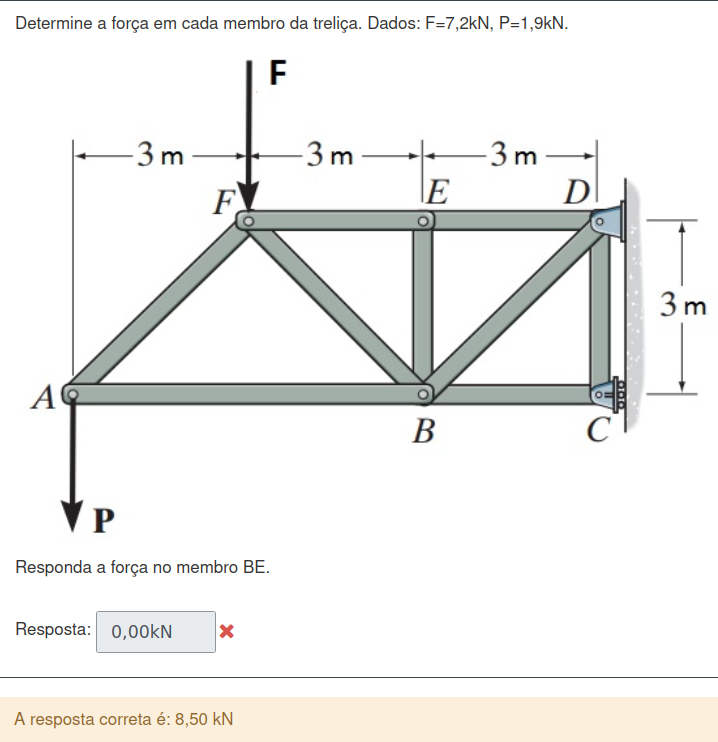

In [83]:
questao='3.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [84]:
%%write_and_run ../data/Q5/inputs/{questao}.py
F=7.2
P=1.9


In [85]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
FAF=2**0.5*P
FAB=-P
FCD=0
FCB=-3*P-2*F
FDE=2*P+F
FEF=2*P+F
FEB=0
FBF=-2**0.5*(F+P)
FDB=2**0.5*(F+P)
resposta(FEB,'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'FAF=2**0.5*P', 'FAB=-P', 'FCD=0', 'FCB=-3*P-2*F', 'FDE=2*P+F', 'FEF=2*P+F', 'FEB=0', 'FBF=-2**0.5*(F+P)', 'FDB=2**0.5*(F+P)', "resposta(FEB,'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
FAF   2.69
FAB  -1.90
FCD   0.00
FCB -20.10
FDE  11.00
FEF  11.00
FEB   0.00
FBF -12.87
FDB  12.87

A resposta final é:


0.000kN

<IPython.core.display.Math object>

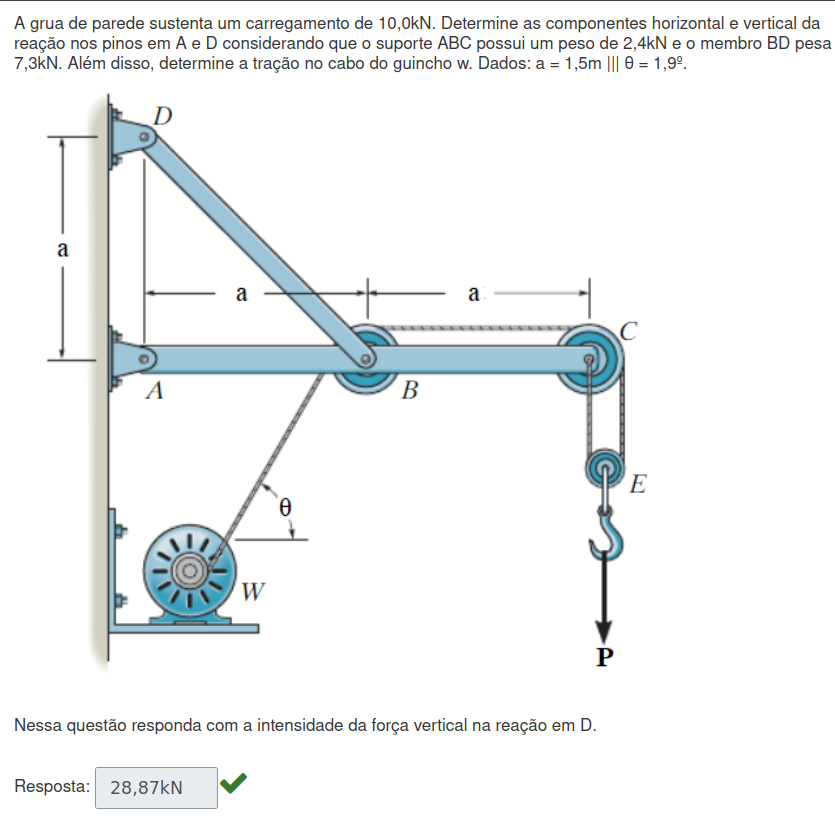

In [86]:
questao='3.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [87]:
%%write_and_run ../data/Q5/inputs/{questao}.py
thetad=1.9
a=1.5
P=10
PABC=2.4
PBD=7.3


In [88]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
theta=np.deg2rad(thetad)
FBW=P/2
FBWy=sy.sin(theta)*FBW
FBWx=sy.cos(theta)*FBW
RDx=-2*P-PBD/2-PABC-FBWy
RAx=FBWx-RDx
RDy=-RDx+PBD/2
RAy=PBD+PABC+P+FBWy-RDy
resposta(abs(RDy),'kN')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'theta=np.deg2rad(thetad)', 'FBW=P/2', 'FBWy=sy.sin(theta)*FBW', 'FBWx=sy.cos(theta)*FBW', 'RDx=-2*P-PBD/2-PABC-FBWy', 'RAx=FBWx-RDx', 'RDy=-RDx+PBD/2', 'RAy=PBD+PABC+P+FBWy-RDy', "resposta(abs(RDy),'kN')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
theta               0.03
FBW                  5.0
FBWy   0.165775891942631
FBWx    4.99725107970879
RDx    -26.2157758919426
RAx     31.2130269716514
RDy     29.8657758919426
RAy    -10.0000000000000

A resposta final é:


29.866kN

<IPython.core.display.Math object>

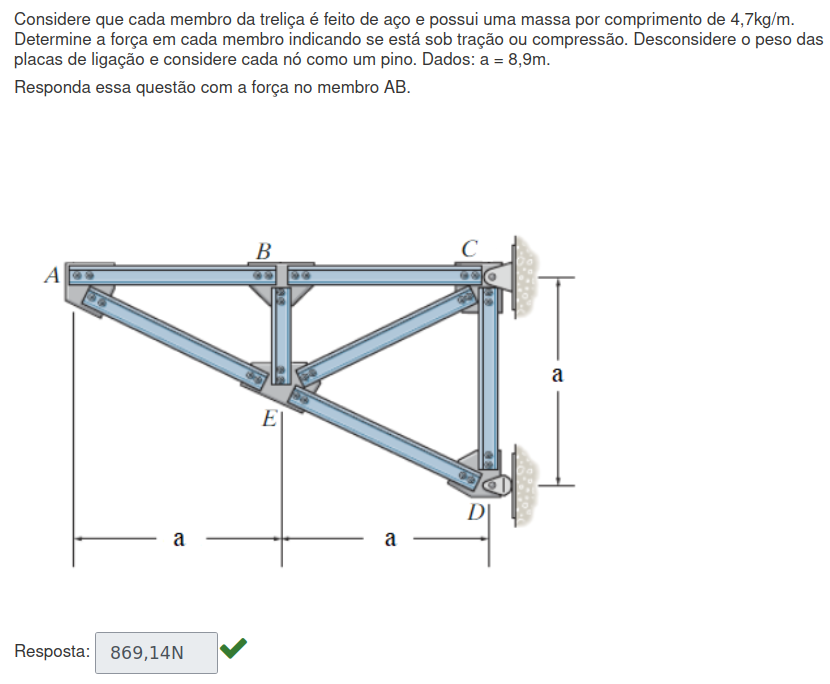

In [89]:
questao='3.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q5/images/'+questao+'.png') 


In [90]:
%%write_and_run ../data/Q5/inputs/{questao}.py
d=4.7
a=8.9


In [91]:
%%write_and_run ../data/Q5/resolutions/{questao}.py
g=9.81
FAB=a*d*(1+(5**0.5)/2)*g
resposta(FAB,'N')


AAAAAAAAAAAAA
['%%write_and_run../data/Q5/resolutions/{questao}.py', 'g=9.81', 'FAB=a*d*(1+(5**0.5)/2)*g', "resposta(FAB,'N')", '']


/tmp/ipykernel_52465/3168888660.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


0
g      9.81
FAB  869.14

A resposta final é:


869.140N